## Observations and Insights

## Dependencies and starter code

In [42]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import random
import os

# Study data files
file_to_load1 = os.path.join("data", "Mouse_metadata.csv")
file_to_load2 = os.path.join("data", "Study_results.csv")

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(file_to_load1)
study_results = pd.read_csv(file_to_load2)

# Combine the data into a single dataset
mouseStudyResults = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
mouseStudyResults.head(10)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


## Summary statistics

In [2]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM
#   of the tumor volume for each regimen

groupedDrugs = mouseStudyResults.groupby('Drug Regimen')['Tumor Volume (mm3)']

drugs = pd.DataFrame({
    "Mean Tumor Volume" : groupedDrugs.mean()
})

drugs["Median Tumor Volume"] = mouseStudyResults.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
drugs["Tumor Volume Variance"] = mouseStudyResults.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
drugs["Tumor Size Standard Deviation"] = mouseStudyResults.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

instancesDrug = mouseStudyResults.groupby("Drug Regimen")["Drug Regimen"].count()

drugs["Standard Error of the Mean"] = drugs["Tumor Volume Variance"]/instancesDrug

#CHECK SEM VALUES
drugs

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Size Standard Deviation,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.108469
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.220731
Infubinol,52.884795,51.820584,43.128684,6.567243,0.242296
Ketapril,55.235638,53.698743,68.553577,8.279709,0.364647
Naftisol,54.331565,52.509285,66.173479,8.134708,0.355771
Placebo,54.033581,52.288934,61.168083,7.821003,0.337945
Propriva,52.322552,50.854632,42.351070,6.507770,0.263050
Ramicane,40.216745,40.673236,23.486704,4.846308,0.103012
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.328456


## Bar plots

Text(0.5, 1.0, 'Data Points per Drug in Study')

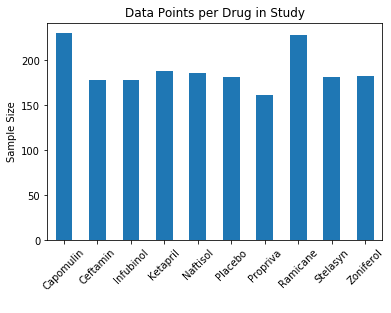

In [3]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# ADD LABELS
ax = instancesDrug.plot(kind="bar", rot=45)
ax.set_ylabel("Sample Size")
ax.set_xlabel(" ")
ax.set_title("Data Points per Drug in Study")

<function matplotlib.pyplot.show(*args, **kw)>

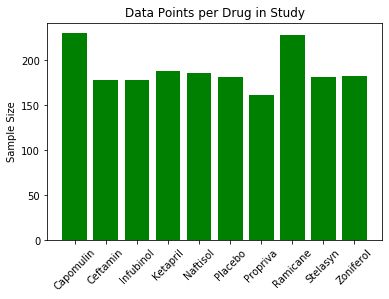

In [4]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot 
x_axis = np.arange(len(drugs))
plt.bar(x_axis, instancesDrug, color="g", align="center")

tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs.index, rotation=45)
plt.title("Data Points per Drug in Study")
plt.ylabel("Sample Size")
plt.show

## Pie plots

Text(0.5, 1.0, 'Male vs Female Mice in Study')

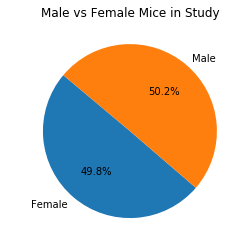

In [5]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Notice I am using mouse_metadata here rather than my merged dataframe, to be sure each mouse is only counted once.
maleVfemale = mouse_metadata.groupby("Sex")["Sex"].count()
ax2 = maleVfemale.plot(kind="pie", startangle=140, autopct="%1.1f%%")

# Just used the below line to prevent plot from printing with column name along the left side.
ax2.set_ylabel(" ")
ax2.set_title("Male vs Female Mice in Study")

Text(0.5, 1.0, 'Male vs Female Mice in Study')

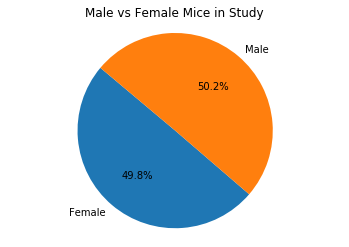

In [6]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(maleVfemale, labels=maleVfemale.index, autopct="%1.1f%%", startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.title("Male vs Female Mice in Study")

## Quartiles, outliers and boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.

# Sorted tumor volume mean allows me to identify the four most promising drugs.
sortedTumors = drugs["Mean Tumor Volume"].sort_values()
fourBestDrugs = sortedTumors.index[0:4]

# This finds all mouse data associated with the four best drugs
topDrugsMice = mouseStudyResults.loc[mouseStudyResults["Drug Regimen"].isin(fourBestDrugs)]

# This grabs the index associated with each max timepoint per mouse,
#   then I grab those indices out of the parent dataframe and reference the tumor volume of each row.
timeIdxPerMouse = topDrugsMice.groupby("Mouse ID")["Timepoint"].idxmax()
bestDrugMice = mouseStudyResults.iloc[timeIdxPerMouse]
finalVolPerMouse = pd.DataFrame({
    "Mouse ID" : bestDrugMice["Mouse ID"],
    "Final Tumor Volume (mm3)" : bestDrugMice["Tumor Volume (mm3)"]
})
finalVolPerMouse.head()

# Calculate the IQR and quantitatively determine if there are any potential outliers.

quartiles = finalVolPerMouse.quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq-lowerq

print(f"The lower quartile of tumor volumes is: {round(lowerq,2)}")
print(f"The upper quartile of tumor volumes is: {round(upperq,2)}")
print(f"The interquartile range of tumor volumes is: {round(iqr,2)}")
print(f"The the median of tumor volumes is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.")

numOutliers = 0
for volume in finalVolPerMouse:
    if volume > upper_bound:
        numOutliers += 1
    if volume < lower_bound:
        numOutliers += 1

print(f"There are {numOutliers} outliers.")       

KeyError: 0.25

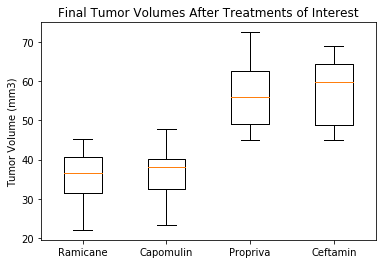

In [8]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
finTumorBPdata = []
for drug in fourBestDrugs:
    currentDrugMice = bestDrugMice.loc[bestDrugMice["Drug Regimen"] == drug]
    finTumorBPdata.append(currentDrugMice["Tumor Volume (mm3)"])

fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes After Treatments of Interest')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(finTumorBPdata)

tick_locations = [1, 2, 3, 4]
plt.xticks(tick_locations, fourBestDrugs, rotation=0)

plt.show()

## Line and scatter plots

Text(0, 0.5, 'Tumor Volume (mm3)')

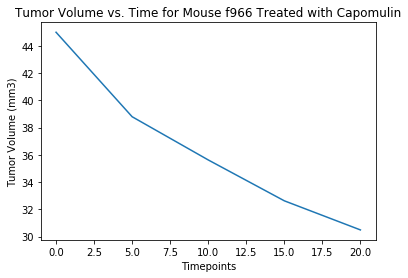

In [28]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# I have set this up to choose a random Capomulin mouse each time!
#   Run this cell multiple times to see my hard work :D
capomulinRows = mouseStudyResults.loc[mouseStudyResults["Drug Regimen"] == "Capomulin"]
capomulinMice = capomulinRows["Mouse ID"].unique()

ID = random.choice(capomulinMice)

capMouse = mouseStudyResults.loc[mouseStudyResults["Mouse ID"] == ID]
x_axis = capMouse["Timepoint"]
y_axis = capMouse["Tumor Volume (mm3)"]

plt.plot(x_axis, y_axis)

plt.title(f"Tumor Volume vs. Time for Mouse {ID} Treated with Capomulin")
plt.xlabel("Timepoints")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

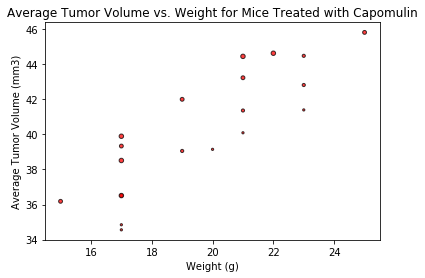

In [56]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# This generates the average tumor volume per mouse
capAvgTumor = capomulinRows.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# This grabs the weight of each mouse
capMiceWeight = capomulinRows.groupby("Mouse ID")["Weight (g)"].unique()

plt.scatter(capMiceWeight, capAvgTumor, marker="o", facecolors="red", edgecolors="black",
           s=x_axis, alpha=0.75)

plt.title(f"Average Tumor Volume vs. Weight for Mice Treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

The linear regression best-fit line is: y = 0.95x + 21.55
The r-squared value is: 0.71


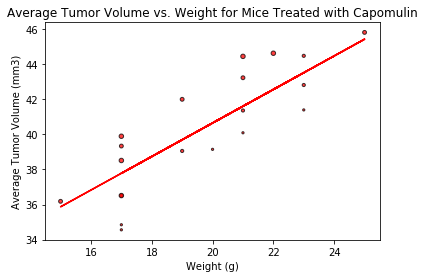

In [55]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume
#   for the Capomulin regimen

x_values = capMiceWeight.astype(float)
y_values = capAvgTumor.astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values, y_values, marker="o", facecolors="red", edgecolors="black",
           s=x_axis, alpha=0.75)
plt.plot(x_values,regress_values,"r-")

plt.title(f"Average Tumor Volume vs. Weight for Mice Treated with Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

print(f"The linear regression best-fit line is: {line_eq}")
print(f"The r-squared value is: {round(rvalue**2, 2)}")
plt.show()